In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

In [8]:
s=500
ds = 50
t = 600
dt = 20
v,s,t,ds,dt = sp.symbols('v,s,t,ds,dt')

v = s/t

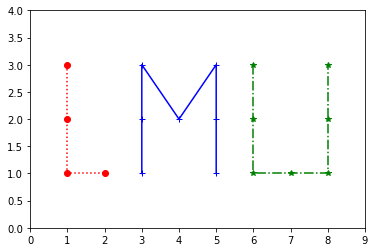

In [13]:
plt.plot([1,1,1,2],[3,2,1,1],'r:o')
plt.plot([3,3,3,4,5,5,5],[1,2,3,2,3,2,1],'b-+')
plt.plot([6,6,6,7,8,8,8],[3,2,1,1,1,2,3],'g-.*')
plt.axis([0,9,0,4])
plt.show()

Text(0.5, 1.0, 'DOAS measurements using 3 different light paths')

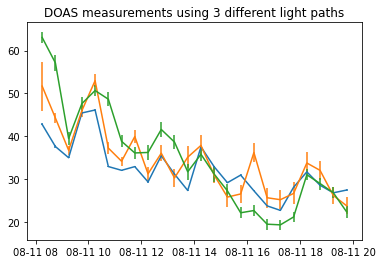

In [63]:
#plotting no2 doas data
data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

x = dates.num2date(data[:,0])
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

plt.errorbar(x, measure1, yerr=uncert1)
plt.errorbar(x,measure2, yerr=uncert2)
plt.errorbar(x,measure3, yerr=uncert3)
plt.title('DOAS measurements using 3 different light paths')

In [31]:
np.shape(data)

(24, 7)

2*c**2*h/(lam**5*(exp(c*h/(T*k*lam)) - 1))
-10*c**2*h/(lam**6*(exp(c*h/(T*k*lam)) - 1)) + 2*c**3*h**2*exp(c*h/(T*k*lam))/(T*k*lam**7*(exp(c*h/(T*k*lam)) - 1)**2)
2*T**6*k**6*x**7*exp(x)/(c**4*h**5*(exp(x) - 1)**2) - 10*T**6*k**6*x**6/(c**4*h**5*(exp(x) - 1))
L subs no const: 	2*x**6*(x*exp(x) - 5*exp(x) + 5)/(1 - exp(x))**2
The minimum f(x) = -0.0008658866055567976	for x = 4.9651100000194255


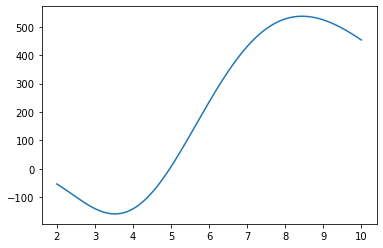

In [54]:
#deriving wien´s displacement

lam, T, h, c, k, x = sp.symbols('lam, T, h, c, k, x')

L_dlam = (2*h*c**2)/(lam**5*(sp.exp(h*c/(k*T*lam))-1))
print(L_dlam)
L = sp.diff(L_dlam, lam)
print(L)
L_subs = L.subs(lam, 1/x/k/T*h*c)
print(L_subs)
L_subs_no_const = L_subs*(c**4*h**5)/(T**6*k**6)
L_subs_no_const = L_subs_no_const.simplify()
print('L subs no const: \t' + str(L_subs_no_const))

f = sp.utilities.lambdify(x, L_subs_no_const, 'numpy')
a = np.arange(2.0, 10, 0.00001)
mini=10.0
mini_x = 0
out = f(a)
plt.plot(a,out)
for i in np.arange(2.0, 10, 0.00001):
    if(abs(f(i))<abs(mini)): 
        mini = f(i)
        mini_x = i
print('The minimum f(x) = ' + str(mini) + '\tfor x = ' + str(mini_x)) 

In [43]:
out.shape

(800,)

Process LIDAR Measurements

In [55]:
data_yalis = np.loadtxt('yalis_130417_raw.txt', delimiter=',')

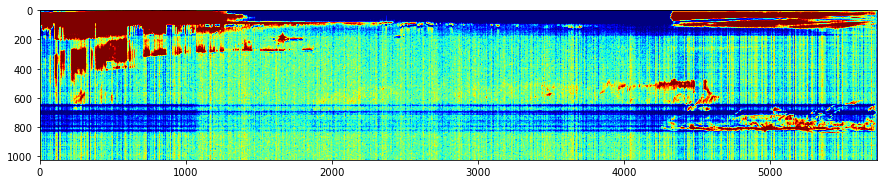

In [74]:
data_yalis_corr1 = data_yalis*1
for i in range(len(data_yalis)):
    data_yalis_corr1[i,:] = data_yalis[i,:] - data_yalis[i,-10:].mean()

data_yalis_corr2 = data_yalis_corr1*1
for j in range(data_yalis.shape[1]):
    data_yalis_corr2[:,j] = data_yalis_corr1[:,j]*((data_yalis.shape[1]-(j+1))*15)**2
    
#plot in log 10

log10_data = np.log10(np.clip(data_yalis,10**(-3),10**(0)))
log10_data_corr1 = np.log10(np.clip(data_yalis_corr1,10**(-3.5),10**(0.5)))
log10_data_corr2 = np.log10(np.clip(data_yalis_corr2,10**(-3.5),10**(0.5)))

plt.rcParams["figure.figsize"] = (15,15)

plt.imshow(log10_data_corr2, cmap='jet')
ax = plt.gca()
ax.invert_yaxis()
plt.show()

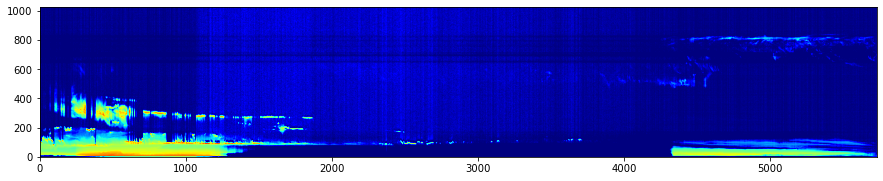

In [68]:
plt.imshow(log10_data_corr1, cmap='jet')
ax = plt.gca()
ax.invert_yaxis()
plt.show()

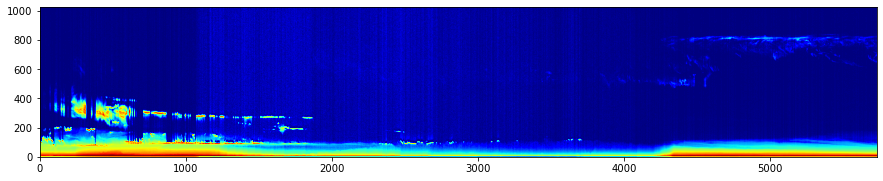

In [69]:
plt.imshow(log10_data, cmap='jet')
ax = plt.gca()
ax.invert_yaxis()
plt.show()

Task: Measure the emissions of vehicles

In [4]:
dilution=np.array([0.2,0.45,0.62, 0.7,
0.68,0.61,0.52,0.44,0.38,0.33,0.29,0.27,
0.25,0.24,0.235,0.23,0.226,0.221,0.219])

b=np.array([35.42,37.93,39.33,41.91,45.07,
48.86,55.,61.35,69.78,77.12,78.72,76.4])

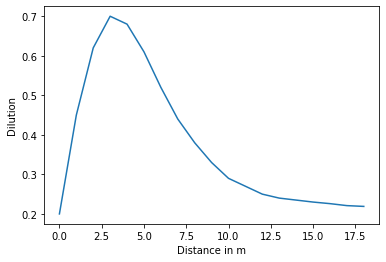

In [23]:
plt.plot(dilution)
plt.ylabel('Dilution')
plt.xlabel('Distance in m')
plt.show()

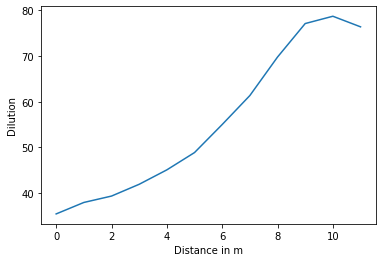

In [22]:
plt.plot(b)
plt.ylabel('Dilution')
plt.xlabel('Distance in m')
plt.show()

Text(0.5, 0, 'Time passed in hours')

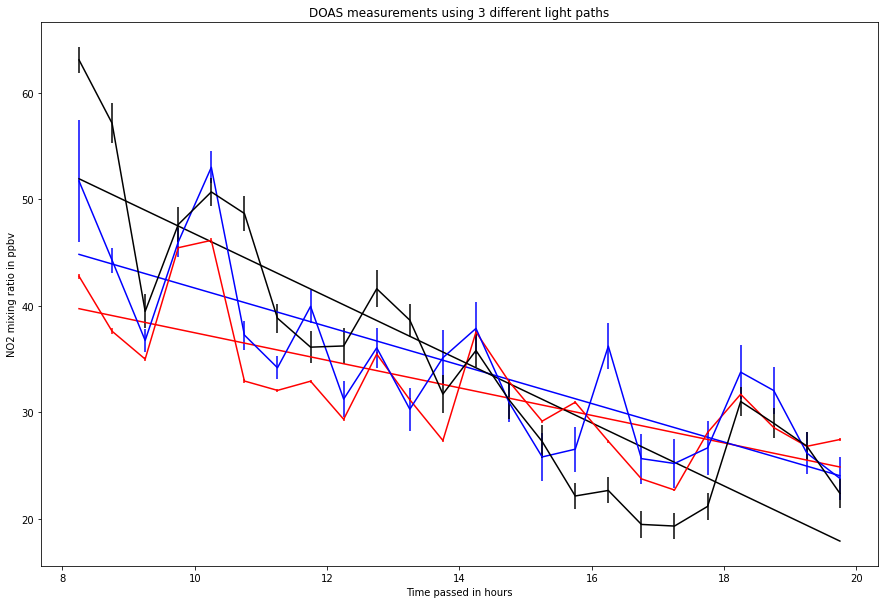

In [7]:
#plotting no2 doas data and its linear regressions

#open the NO2 Doas file and read in the data

data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

#save the measurements and the uncertainties in variables

t = (data[:,0]-735090)*24
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

#calculate the covariances and the linear regressions

covariance1=np.cov(t,measure1)
x=np.zeros(2)
x[1]=covariance1[1,0]/covariance1[0,0]
x[0]=np.mean(measure1)-x[1]*np.mean(t)
lin_reg1 = x[0]+ x[1]*t

covariance2=np.cov(t,measure2)
x=np.zeros(2)
x[1]=covariance2[1,0]/covariance2[0,0]
x[0]=np.mean(measure2)-x[1]*np.mean(t)
lin_reg2 = x[0]+ x[1]*t

covariance3=np.cov(t,measure3)
x=np.zeros(2)
x[1]=covariance3[1,0]/covariance3[0,0]
x[0]=np.mean(measure3)-x[1]*np.mean(t)
lin_reg3 = x[0]+ x[1]*t

#plot the measurements, their errors and the linear regressions in one figure with a color code

fig = plt.figure(figsize = (15,10))
plt.plot(t,lin_reg1, color = 'r')
plt.plot(t,lin_reg2, color = 'b')
plt.plot(t,lin_reg3, color = 'k')
plt.errorbar(t, measure1, yerr=uncert1, color = 'r')
plt.errorbar(t,measure2, yerr=uncert2, color = 'b')
plt.errorbar(t,measure3, yerr=uncert3, color = 'k')
plt.title('DOAS measurements using 3 different light paths')
plt.ylabel('NO2 mixing ratio in ppbv')
plt.xlabel('Time passed in hours')

In [ ]:
data